# An Efficient Deep Learning Method for Detection of COVID-19 Infection Using Chest X-ray Images

The proposed automated framework to classify COVID-19 infection cases from normal and pneumonia using CXR images are depicted in Figure 2. The framework consists of two stages:
- (i) prepossessing which includes image enhancement, data augmentation, and image normalization
- (ii) classification using the proposed light-weight CNN model (LW-CORONet).

# Pre-Processing
Image enhancement is frequently used in the biomedical image processing domain to improve image quality [38,39]. Therefore, in this study, we performed the image enhancement by employing bilinear interpolation (BI) followed by the contrast- limited adaptive histogram equalization (CLAHE) technique. Initially, BI was applied to replace the missing pixel by computing a weighted average of the nearest boundary pixels [40]. Then, CLAHE was employed for contrast enhancement that prevents over- enhancement of noise present in the images [41,42], thereby, facilitating better diagnosis. Figure 3 depicts the outcomes of the preprocessing stage (BI and CLAHE).

In [43]:
# link per attuare Interpolazione Bilineare: https://www.askpython.com/python-modules/numpy/bilinear-interpolation-python

from torch.nn.functional import interpolate
import os
from PIL import Image
from torchvision.transforms import transforms

path = os.path.join(".", "Data", "train", "COVID19", "COVID19(0).jpg")
ImageFile = Image.open(path)
transform = transforms.Compose([
    transforms.Resize((256,256)),
    transforms.ToTensor()
])

ImageFile = transform(ImageFile)
BI_Image_file = interpolate(ImageFile.unsqueeze(0), size=(256, 256), mode='nearest')

In [55]:
import torch
for file_name in os.listdir(os.path.join(".", "Data", "train", "NORMAL")):

    path = os.path.join(".", "Data", "train", "NORMAL", file_name)
    ImageFile = Image.open(path)
    transform = transforms.Compose([
        transforms.Resize((256,256)),
        transforms.ToTensor()
    ])

    ImageFile = transform(ImageFile)
    print(f"{file_name}: {torch.isnan(ImageFile)[0].unique()}")

NORMAL(272).jpg: tensor([False])
NORMAL(788).jpg: tensor([False])
NORMAL(622).jpg: tensor([False])
NORMAL(1138).jpg: tensor([False])
NORMAL(1092).jpg: tensor([False])
NORMAL(337).jpg: tensor([False])
NORMAL(767).jpg: tensor([False])
NORMAL(1211).jpg: tensor([False])
NORMAL(858).jpg: tensor([False])
NORMAL(675).jpg: tensor([False])
NORMAL(225).jpg: tensor([False])
NORMAL(730).jpg: tensor([False])
NORMAL(360).jpg: tensor([False])
NORMAL(1180).jpg: tensor([False])
NORMAL(5).jpg: tensor([False])
NORMAL(419).jpg: tensor([False])
NORMAL(1246).jpg: tensor([False])
NORMAL(233).jpg: tensor([False])
NORMAL(663).jpg: tensor([False])
NORMAL(399).jpg: tensor([False])
NORMAL(1179).jpg: tensor([False])
NORMAL(1196).jpg: tensor([False])
NORMAL(376).jpg: tensor([False])
NORMAL(726).jpg: tensor([False])
NORMAL(819).jpg: tensor([False])
NORMAL(1250).jpg: tensor([False])
NORMAL(1084).jpg: tensor([False])
NORMAL(634).jpg: tensor([False])
NORMAL(264).jpg: tensor([False])
NORMAL(771).jpg: tensor([False])
NOR

In [49]:
import torch
torch.isnan(ImageFile)[0].unique()

tensor([False])

In [50]:
import torch
import numpy as np
from PIL import Image
from torchvision.transforms import transforms
import os

# Percorso dell'immagine
path = os.path.join(".", "Data", "train", "COVID19", "COVID19(0).jpg")

# Caricamento dell'immagine
ImageFile = Image.open(path)

# Trasformazione dell'immagine per ridimensionarla e convertirla in tensor
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Ridimensionamento dell'immagine
    transforms.ToTensor()  # Conversione in tensor
])

# Applicare le trasformazioni all'immagine
ImageFile = transform(ImageFile)


# Funzione per fare interpolazione bilineare sui pixel mancanti
def bilinear_interpolation_for_missing_pixels(image):
    # Otteniamo una copia dell'immagine originale
    filled_image = image.clone()

    # Iteriamo su ogni pixel dell'immagine
    for i in range(1, image.shape[1] - 1):  # Evitiamo i bordi
        for j in range(1, image.shape[2] - 1):
            if torch.isnan(filled_image[0, i, j]):  # Se il pixel è mancante
                # Identifichiamo i pixel vicini
                top_left = filled_image[0, i-1, j-1]
                top_right = filled_image[0, i-1, j+1]
                bottom_left = filled_image[0, i+1, j-1]
                bottom_right = filled_image[0, i+1, j+1]

                # Interpolazione bilineare sui quattro vicini
                # Media pesata sui vicini, approssimazione semplice per bilineare
                interpolated_value = (top_left + top_right + bottom_left + bottom_right) / 4

                # Sostituire il pixel mancante con il valore interpolato
                filled_image[0, i, j] = interpolated_value

    return filled_image

# Applicare l'interpolazione bilineare solo ai pixel mancanti
filled_image = bilinear_interpolation_for_missing_pixels(ImageFile)

# Convertiamo nuovamente in un'immagine PIL per visualizzarla (se necessario)
ImageFile_pil = transforms.ToPILImage()(filled_image)
ImageFile_pil.show()


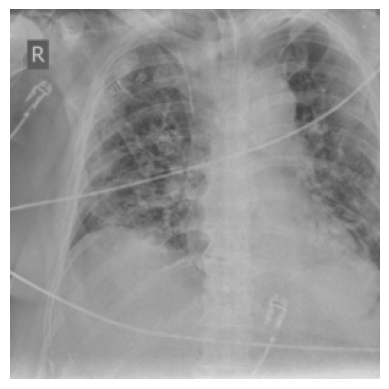

In [13]:
from torchvision.transforms import transforms
import os.path

from PIL import Image
from matplotlib import pyplot as plt

path = os.path.join('./Data/train/COVID19/COVID19(0).jpg')
H, W = 256, 256
transform = transforms.Compose([
    transforms.Resize((H,W)),
    #transforms.ToTensor()
])
ImageFile = Image.open(path).convert('RGB')
ImageFile = transform(ImageFile)

plt.imshow(ImageFile)
plt.axis('off')  # Disattiva gli assi
plt.show()

# Data Augmentation

In [ ]:
from torchvision.transforms import transforms

# Funzione per aggiungere rumore gaussiano
def add_gaussian_noise(img, mean=0, std=0.25):
    noise = torch.randn_like(img) * std + mean
    noisy_img = img + noise
    noisy_img = torch.clamp(noisy_img, 0., 1.)  # Assicuriamoci che i valori siano tra 0 e 1
    return noisy_img

# Data Augmentation
data_augmentation = transforms.Compose([
    transforms.RandomHorizontalFlip(p=1.0),  # Probabilità di 1 per il flip orizzontale
    transforms.RandomRotation(degrees=15),  # Rotazione casuale tra -15 e 15 gradi
    transforms.Lambda(lambda x: add_gaussian_noise(x) if torch.rand(1).item() > 0.5 else x),  # Aggiungi rumore gaussiano con probabilità del 50%
    transforms.Resize((224,224))
])

# Image Normalization
image_normalization = transforms.Compose([
    transforms.Normalize(mean=[0.255, 0.255, 0.255], std=[0.255, 0.255, 0.255]),
    transforms.ToTensor()
])

In [ ]:
import torch.nn as nn
class LWCORONet(nn.Module):
    def __init__(self):
        super.__init__(self)
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5, stride=2)
        self.norm1 = nn.BatchNorm2d(num_features=64)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(3, stride=3)

        self.conv2 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3)
        self.norm2 = nn.BatchNorm2d(num_features=128)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(3, stride=3)

        self.conv3 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3)
        self.norm3 = nn.BatchNorm2d(num_features=256)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(3, stride=3)

        # Operazioni d applicare in sequinto
        self.norm1d = nn.BatchNorm1d(num_features=2304)
        self.drop1 = nn.Dropout(p=0.5)

        self.norm1d_2 = nn.BatchNorm1d(num_features=128)
        self.drop1 = nn.Dropout(p=0.5)


    def forward(self,x):
        x = self.conv1(x)
        x = self.norm1(x)
        x = self.relu1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.norm2(x)
        x = self.relu2(x)
        x = self.pool2(x)

        x = self.conv3(x)
        x = self.norm3(x)
        x = self.relu3(x)
        x = self.pool3(x)

        # Layer densi
        x = nn.Flatten(x, 1)


# Load Model

In [5]:
from PIL import Image
import torch
from torchvision import transforms
from LwCoronNet import *

# Funzione per caricare e classificare una singola immagine
def classify_single_image(image_path, model, transform, device, class_names):
    # Carica l'immagine
    image = Image.open(image_path).convert('RGB')  # Converte in RGB nel caso sia in scala di grigi

    # Applica le trasformazioni
    input_tensor = transform(image).unsqueeze(0)  # Aggiungi una dimensione batch

    # Sposta su dispositivo (GPU o CPU)
    input_tensor = input_tensor.to(device)

    # Disabilita il calcolo dei gradienti per inferenza
    with torch.no_grad():
        # Passa l'immagine attraverso il modello
        output = model(input_tensor)

        # Ottieni la classe con la massima probabilità
        _, predicted_class = torch.max(output, 1)

    # Restituisci il nome della classe predetta
    return class_names[predicted_class.item()]

# Definisci il percorso dell'immagine
image_path = "./Data/test/COVID19/COVID19(461).jpg"
#image_path = "./Data/test/NORMAL/NORMAL(1277).jpg"
#image_path = "./Data/test/PNEUMONIA/PNEUMONIA(3418).jpg"

# Assumiamo che il dataset abbia già una lista di nomi di classi
class_names = ['COVID19', 'NORMAL', 'PNEUMONIA']#test_dataset.classes  # Sostituisci con la tua lista di classi
H,W = 224, 224
# Definisci le trasformazioni necessarie (assicurati siano le stesse usate durante il training)
transform_single = transforms.Compose([
    transforms.Resize((H, W)),  # Dimensioni d'ingresso del modello
    transforms.ToTensor(),
])

model = LwCoronNet()
model_path = os.path.join(".","training_results",f"model_epoch_{8}.pth")
model.load_state_dict(torch.load(model_path, weights_only=True))
model.eval()
device = "cpu"

# Classifica l'immagine
predicted_label = classify_single_image(image_path, model, transform_single, device, class_names)
print(f"Predicted Label: {predicted_label}")


Predicted Label: COVID19


# Valutazioni delle prestazioni sul dataset di Test

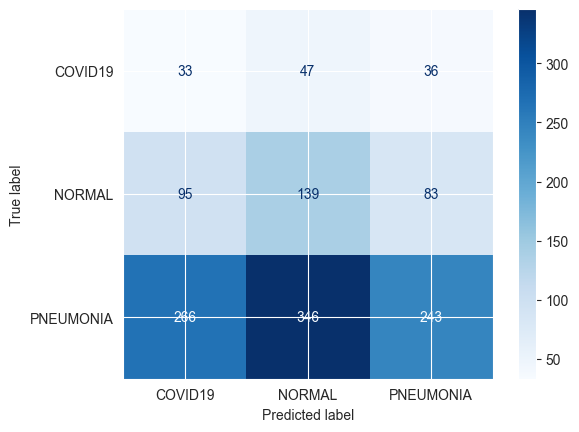

<Figure size 640x480 with 0 Axes>

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import numpy as np

y_pred = []
y_true = []

path_to_test = os.path.join(".", "Data", "test")
transform_DL = transforms.Compose([
    transforms.Resize((H,W)),
    transforms.ToTensor()
])
test_dataset = datasets.ImageFolder(path_to_test, transform=transform_DL)
testLoader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)
net = LwCoronNet()

# iterate over test data
for inputs, labels in testLoader:
        #inputs = transform(inputs).unsqueeze(0)
        inputs = inputs.to(device)

        # Disabilita il calcolo dei gradienti per inferenza
        with torch.no_grad():
            # Passa l'immagine attraverso il modello
            output = net(inputs)

            # Ottieni la classe con la massima probabilità
            _, predicted_class = torch.max(output, 1)

        y_pred.extend(predicted_class) # Save Prediction

        y_true.extend(labels) # Save Truth

# constant for classes
classes = ['COVID19', 'NORMAL', 'PNEUMONIA']

# Build confusion matrix
from sklearn import metrics
cf_matrix = confusion_matrix(y_true, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cf_matrix, display_labels = classes)
cm_display.plot(cmap=plt.cm.Blues)
plt.show()
plt.savefig('CM_LwCoronNet.png')

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, target_names=classes))


              precision    recall  f1-score   support

     COVID19       0.08      0.28      0.13       116
      NORMAL       0.26      0.44      0.33       317
   PNEUMONIA       0.67      0.28      0.40       855

    accuracy                           0.32      1288
   macro avg       0.34      0.34      0.29      1288
weighted avg       0.52      0.32      0.36      1288



In [42]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Precisione media ponderata (weighted)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
print(f"precision: {precision},\nrecall: {recall},\nf1: {f1}")

precision: 0.517451388275568,
recall: 0.3222049689440994,
f1: 0.35733656159686217
